<a href="https://colab.research.google.com/github/sdlanda77/portfolio/blob/main/Sam_L_hw3_release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (10 points)

In this problem you'll analyze upper confidence bound (UCB) action selection for a simple 3-armed bandit problem. Each of the 3 arms follows a different [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) reward distribution, whose parameters are unknown to the agent, and the goal is maximize the sum of rewards we receive over time.

In the code below, we define three different binomial distributions and use UCB to decide which one to sample. We do so 1000 times (after initialization) and keep track of the UCB values at each timestep (```UCB```), average action value estimates (```Q```), and number of times that each action is tried (```N```).

Q*:      [2.4 3.5 2.4]
Q_1000:  [2.35294118 3.50613497 1.625     ]
N:  [ 17 978   8]


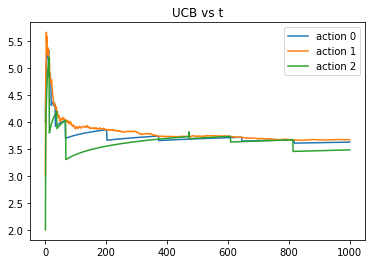

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Initialize 3 sets of parameters (n,p) for the 3 bandit arms
# Run with the provided fixed parameters and answer responses based on results
# You can also try using random parameters to see how UCB performs
n = np.array([4, 5, 8])
p = np.array([0.6, 0.7, 0.3])
# n = np.random.randint(0,10,3)
# p = np.random.random(3)

# Initialize action value estimates in Q by trying each arm once
# Counts are stored in N; UCB stores UCB values at each timestep
Q = np.array([np.random.binomial(n[i], p[i]) for i in range(3)]).astype(float)
N = np.array([1, 1, 1])
UCB = np.empty([1000,3])

# Repeat process using UCB action selection 1000 times
c = 2
for i in range(1,1001):
  UCB[i-1,:] = Q + c*np.sqrt(np.divide(np.log(i),N))
  a = np.argmax(UCB[i-1,:])
  r = np.random.binomial(n[a], p[a])
  Q[a] = (Q[a]*N[a] + r) / (N[a] + 1)
  N[a] += 1

print("Q*:     ", np.multiply(n,p))
print("Q_1000: ", Q)
print("N: ", N)

plt.plot(range(1,1001), UCB[:,0], label="action 0");
plt.plot(range(1,1001), UCB[:,1], label="action 1");
plt.plot(range(1,1001), UCB[:,2], label="action 2");
plt.legend();
plt.title("UCB vs t");

Run the above code for the fixed parameters of ```n``` and ```p```, and try to understand the general behavior shown in the printed results and plot. ```Q*``` are the "true" expected action values, given by $n \cdot p$ for a binomial distribution, while ```Q_1000``` are the action value estimates after we finish sampling. The plot shows the UCB values of each action over time. You should answer the following questions based on the results from the fixed parameters, but we also included a couple lines initializing random parameters if you want to see what UCB does in different scenarios.

1.   Over 1000 runs, do you generally find that we explore all three actions evenly or end up exploiting most of the time? Do all three action value estimates end up close to their true values, and if not, which one(s) end up being the closest?
2.   You should see that at least one of the UCB values exhibits large downward "jumps" at certain timesteps, while increasing smoothly otherwise. Explain both aspects of this behavior.


ENTER YOUR RESPONSES HERE

1.  We explore all three actions pretty evenly at the beginning, but as t increases, we exploit action 1 the most and only occasionally explore 0 and 2, because action 1 has the best action value. Therefore, overall we end up exploiting action 1 most of the time. That is why the action value estimate for action 1 consistently is the closest to its true value of the three actions, because we exploit it more and the confidence increases, giving us a more precise estimate. 

2.  Actions 0 and 2 have more "jumps" than action one because when we explore them, one low reward can cause a bit differenece in the corresponding action value. This is due to the fact that we are not exploiting either of these options, so N is much smaller for these actions, and therefore the impact of a single outcome is more prevalent. The smoother increasing parts can be explained by the numerator term $ln(t)$ in the UCB action selection equation, which increases at a faster rate than the denomenator $N_t(a)$. Therefore, the term slowly and consistently increases while $N_t(a)$ is constant (while the action a is not explored).

# Problem 2 (20 points)

Let's revisit the race car MDP from the lecture. There are three states, of which "overheated" is a terminal state. The other two states each have two valid actions, "fast" and "slow".

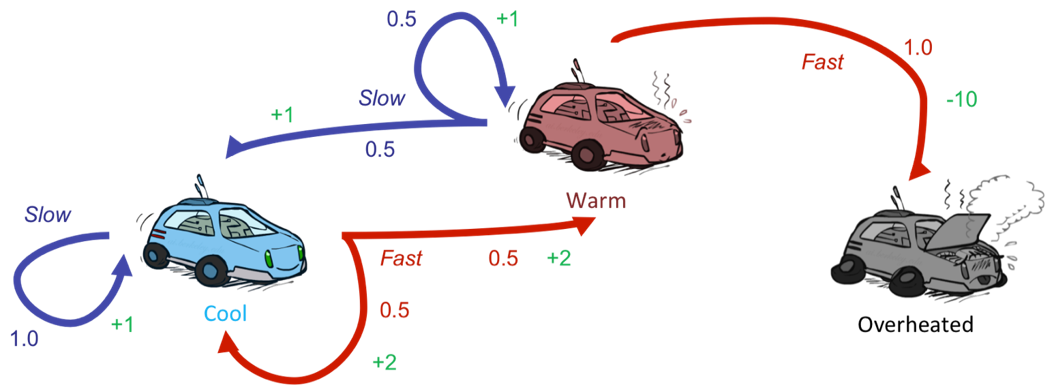

1. Write down and solve a system of linear equations that would give us the state values for the policy of going fast in both the cool and warm states. Use $\gamma = 0.8$ and assume that $V^\pi(\text{overheated}) = 0$.

2. Use the values you found above to "improve" the given policy. Be sure to write down the equations you use. The two steps above constitute one round of policy iteration.

ENTER YOUR RESPONSES HERE

1. 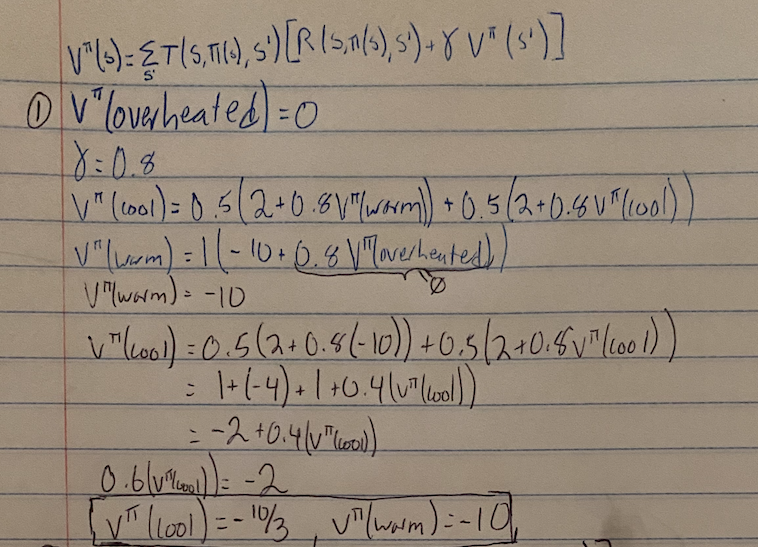

2. 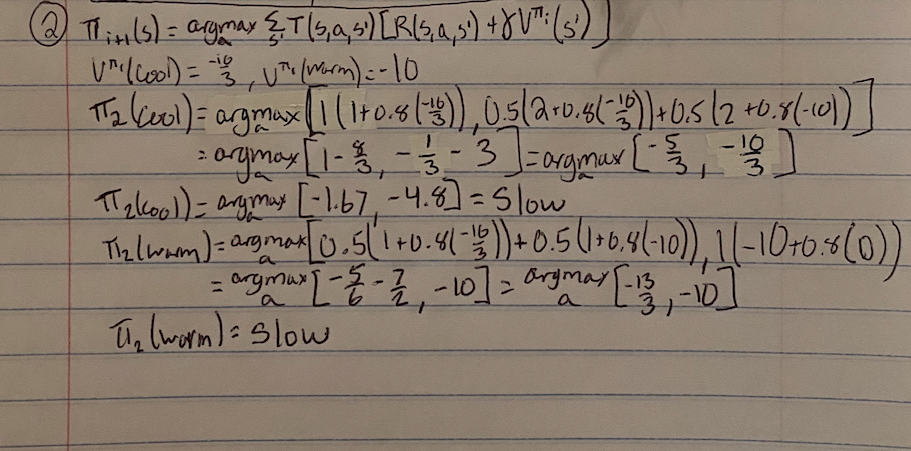



# Cliffworld

In this assignment you will explore sequential decision making in the gridworld with a cliff, or the "cliffworld". As shown in the accompanying figure, the cliffworld is a 4 by 12 grid, where the bottom row consists of a "cliff" along with a start and a goal. We would like our agent to learn to get from start to goal without falling into the cliff. All transitions incur a living reward of -1, except for transitions into the cliff which incur a cost of -100. If the agent falls into the cliff, it is instantly teleported back to the start.

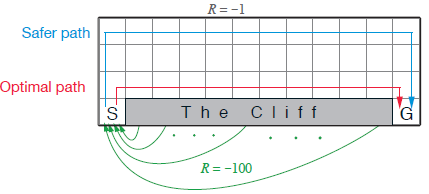

This problem is naturally represented as a MDP with each traversable cell as a state. Actions are left (<), right (>), up (^), and down (v). Actions are also noisy; the agent moves in its intended direction with probability $p$ and in the two adjacent directions with probability $\frac12(1-p)$ each. When the agent moves into a wall, it stays in its original state. 

We have encoded all of this information for you in the ```Qvalue``` function below. A ```state``` is represented as a tuple of two indices that follow the same convention as a Numpy array; top left is (0,0), start is (3,0), and goal is (3,11). Given a ```state```, an ```action```, and a 2D numpy array of ```values```, the function computes the Q-value of taking ```action``` from ```state```, taking into account uncertainties, rewards, and successor state values. A discount factor ```gamma``` may also be applied.

In [ ]:
import numpy as np
actions = ['<', '>', '^', 'v']

def Qvalue(state, action, values, p, gamma):
  """
  Compute the Q-value for the given state-action pair,
  given a set of values for the problem, with successful transition
  probability p and discount factor gamma.
  """
  gV = gamma*values
  pn = (1-p)/2

  # Deal with the possible transitions for the start state separately
  if state == (3,0): 
    if action == '>':
      return p*(-100+gV[(3,0)]) + pn*(-1+gV[(3,0)]) + pn*(-1+gV[(2,0)])
    elif action == '^':
      return p*(-1+gV[(2,0)]) + pn*(-1+gV[(3,0)]) + pn*(-100+gV[(3,0)])
    elif action == 'v':
      return p*(-1+gV[(3,0)]) + pn*(-1+gV[(3,0)]) + pn*(-100+gV[(3,0)])
    else:
      return p*(-1+gV[(3,0)]) + pn*(-1+gV[(3,0)]) + pn*(-1+gV[(2,0)])

  # All possible successor states
  i,j = state
  left = (i,max(j-1,0))
  right = (i,min(j+1,11))
  up = (max(i-1,0),j)
  down = (min(i+1,3),j)

  # Only way we get to the cliff is if we go down from states right above
  if down[0] == 3 and 0 < down[1] < 11:
    down = (3,0)
    dr = -100
  else:
    dr = -1

  # Q-value computation
  if action == '<':
    return p*(-1+gV[left]) + pn*(-1+gV[up]) + pn*(dr+gV[down])
  elif action == '>':
    return p*(-1+gV[right]) + pn*(-1+gV[up]) + pn*(dr+gV[down])
  elif action == '^':
    return p*(-1+gV[up]) + pn*(-1+gV[left]) + pn*(-1+gV[right])
  else:
    return p*(dr+gV[down]) + pn*(-1+gV[left]) + pn*(-1+gV[right])

## Coding 1 (15 points)

We'll implement value iteration to obtain the optimal values for each state. We'll take a synchronous approach, which means that in each sweep we will compute a new array of values using the old set only. Once the new array is filled in, we will replace the old array with the new one and repeat. Recall that the Bellman update, if using state-action values to update state values, looks like the following:

$$ V_{i+1}(s) \leftarrow \max_a Q_i(s,a) $$

We've started this for you below. An initial array of ```values``` is passed in, so you don't have to worry about initialization. At the beginning of each sweep, we define a new array, ```new_values```, which is to be filled in using the Bellman update. The stopping condition is when the maximum difference between the new and old values is smaller than or equal to ```threshold```, at which point the values should be returned. Note the following subtleties:
*   We initialize ```new_values``` to $-\infty$.
*   The cliff and goal state values are fixed at 0 and should not be updated, since they are considered terminals. One way to do your state value updates would be to first update the start state value, and then write a double loop over indices 0 to 2 and indices 0 to 11 (both inclusive) for the rest of the grid.

In [ ]:
def value_iteration(values, p, gamma, threshold=1e-6):
  # Given an initial array of values, returns array of values optimal within threshold
  max_diff = float("inf")
  while max_diff > threshold:
    new_values = -float("inf") * np.ones((4,12))
    new_values[3,1:] = 0

    # YOUR CODE HERE
    new_values[3,0] = max(Qvalue((3,0), '<', values, p, gamma), Qvalue((3,0), '>', values, p, gamma),
                          Qvalue((3,0), '^', values, p, gamma), Qvalue((3,0), 'v', values, p, gamma))
    max_diff = abs(new_values[3, 0] - values[3,0])

    for y in range(3):
      for x in range(12):
        new_values[y,x] = max(Qvalue((y,x), '<', values, p, gamma), Qvalue((y,x), '>', values, p, gamma),
                          Qvalue((y,x), '^', values, p, gamma), Qvalue((y,x), 'v', values, p, gamma))
        if abs(new_values[y,x] - values[y,x]) > max_diff:
          max_diff = abs(new_values[y,x] - values[y,x])
    
    values = np.copy(new_values)

    

  return values

Now that we can compute optimal values, we can extract an optimal policy as well. Recall that this can be done using Q-values as follows:

$$ \pi^*(s) = \text{argmax}_a Q(s,a) $$

We'll implement this for you in ```extract_policy``` below. Following that we also have a wrapper function that uses both functions to find the optimal values and policy together and prints them both out. The values for the cliffworld where all actions are deterministic ($p=1$) and there is no discount ($\gamma=1$) should look like the following:



```
[[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.]
 [-13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.]
 [-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]
 [-13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
```



In [ ]:
def extract_policy(values, p, gamma):
  # Extract the optimal policy associated with the given optimal values
  policy = np.empty(values.shape, dtype=object)
  for i in range(4):
    for j in range(12):
      best_value = -float("inf")
      for a in actions:
        new_value = Qvalue((i,j), a, values, p, gamma)
        if new_value > best_value:
          best_value = new_value
          policy[i,j] = a
  return policy

def optimal_values_policy(p, gamma):
  # Find and show the optimal values and policy for the given parameters
  values = value_iteration(np.zeros((4,12)), p, gamma)
  policy = extract_policy(values, p, gamma)
  print(np.round(values,2))
  print("")
  policy[3,1:11] = 'C'
  policy[3,11] = 'G'  
  print(policy)

In [ ]:
p = 1
#gamma = .2
gamma = 1
print('p = gamma = ', p)
optimal_values_policy(p, gamma)

p = gamma =  1
[[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.]
 [-13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.]
 [-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]
 [-13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


## Response 1 (15 points)
Now that you can see what an optimal policy looks like for the cliffword, your task is to think about the effects of the parameters of the problem. Run the preceding cell with various values and answer the following.

1. What happens to the values and policy when we decrease the discount factor? Try both high values (e.g., 0.9) and low values (e.g., 0.2). Does the optimal policy for small values of $\gamma$ always lead the agent to the goal? Why or why not?

2. Set the discount to 1 again. Decrease the transition success probability to 0.9. Why do the values become more negative? Now observe what happens to the values as you decrease $p$ closer to 0. What happens to the policy at $p=0$ and why?

3. Set $p = 0.9$ and $\gamma = 0.9$. There is a slight uncertainty to the agent's actions, and the agent looks far out but not infinitely into the future. How does the new optimal policy compare to when $p = \gamma = 1$?

ENTER YOUR RESPONSES HERE

1. The optimal policy for small values of gamma does not always lead the agent to the goal. As gamma decreases, the impact of future potential awards also decreases. Therefore, the optimal policy is more focused on immediate effect and rewards, as opposed to long term rewards. Since it is risky to proceed to the right across the gridworld becasue of the possibility of falling off the cliff, the optimal policy for a small value of gamma will instead send the agent to the left, which ensures that it will never fall off the cliff (in the case of p=1). This is safer in the immediate future but ultimately detremental becasue the agent will not reach the goal. 

2. The values become more negative as the transition success probability approaches zero becasue the expected reward decreases due to the lack of determinability of actions. When p = 1, the agent can move exactly where it intends do, allowing us to optimize the expected reward and therefore optimize the policy. As p approaches zero, the agent loses this control as the actions become less predictable. As a result, the expected reward decresases to account for the agent accidentally falling into the cliff. When p = 0, the optimal policy relies on the fact that the agent will take the action of going to either side of the specified direction and never in the intended direction or the opposite direction. Therefore, this optimal policy does ensure that the agent reaches the goal, it will just nearly always take more moves than when p=1. Basically, with p=0 the agents knows where it will NOT move so it can prevent falling off the cliff and move side to side along the cliff until it happens to reach the final column. Then, it will move up and down that column until it reaches the goal. 

3. The policy with $p = \gamma = 0.9$ ensures that the agent does not fall off the cliff by accounting for the fact that it may move to the side of the intended direction, but never in the opposite direction. That is why is all the states (2, x), the agent moves up. It will move on row up (or in 0.1 of cases to one of the sides, in which case it will repeat this action), giving it the security of having a row between itself and the cliff. Once in the (1,x) row, it will traverse across the gridworld, potentially moving one square up or down, but it will not fall into the cliff. 

## Coding 2 (10 points)

You hopefully now have a good understanding of the dynamics of this cliffworld. But our agent may be more clueless--let's suppose it no longer has access to the ```Qvalue``` function (the problem model). To find out what's going on in the world, it will actually have to take actions and learn from them à la reinforcement learning. 

We will use temporal difference learning, which explicitly keeps track of state-action values (Q-values). These will be stored as a dictionary, where the key is a ```(state, action)``` tuple and the value is the Q-value. 

In RL, an agent has to balance exploitation and exploration. A simple way to do so is to use $\varepsilon$-greedy action selection. Remember that in this scheme, an agent selects a random action with probability $\varepsilon$ and the best action (the one with the highest Q-value in the given state) otherwise. Implement this function below (hint: look at using ```random.random()``` and ```random.choice()```).

In [ ]:
import random

def epsilon_greedy_action(Qvalues, state, epsilon):
  # Explore a random action from state with probability epsilon
  # Otherwise, greedily choose the best action
  # Qvalues is a dictionary that looks like {(state, action): q-value}
  
  # YOUR CODE HERE
  if random.random() < epsilon:
    #explore a random action
    return random.choice(actions)
  else: 
    #greedily choose best action
    max_value = -float("inf")
    for a in actions:
      value = Qvalues.get((state, a))
      if value > max_value:
        max_value = value
        my_action = a
    return my_action





During learning, the agent repeatedly takes an action from its current state, observes the successor state and reward, and repeats. If the agent encounters a terminal state (here, cliff or goal), we consider the episode over, and it goes back to the start. The ```step``` function below returns the successor state and associated reward after taking ```action``` from ```state```. This is essentially a black box to the agent, as it has no idea what is inside.

In [ ]:
def step(state, action, p):
  # Return successor state and reward upon taking action from state
  i,j = state

  if action == '<':
    if random.random() < p:
      state = (i,max(j-1,0))
    else:
      state = random.choice([(max(i-1,0),j), (min(i+1,3),j)])
  elif action == '>':
    if random.random() < p:
      state = (i,min(j+1,11))
    else:
      state = random.choice([(max(i-1,0),j), (min(i+1,3),j)])
  elif action == '^':
    if random.random() < p:
      state = (max(i-1,0),j)
    else:
      state = random.choice([(i,max(j-1,0)), (i,min(j+1,11))])
  else:
    if random.random() < p:
      state = (min(i+1,3),j)
    else:
      state = random.choice([(i,max(j-1,0)), (i,min(j+1,11))])    
  
  if state[0] == 3 and 0 < state[1] < 11:
    reward = -100
  else:
    reward = -1
  return state, reward

In class we talk about two approaches to TD learning: SARSA and Q-learning. The Q-value update for SARSA is as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma Q(s',a') - Q(s,a)) $$

Remember that $\alpha$ is the learning rate, and that $a'$ is an action selected for $s'$, again using epsilon-greedy selection. ```SARSA``` is implemented for you in its entirety below. Note that it uses the utility function ```extract_policy```, which uses Q-values and overrides the same function defined earlier for value iteration.

In [ ]:
def SARSA(Qvalues, p, gamma, alpha, epsilon, episodes=100000):
  # SARSA temporal difference learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)
  for i in range(episodes):
    state = (3,0)
    action = epsilon_greedy_action(Qvalues, state, epsilon)
    while state == (3,0) or state[0] != 3:
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, epsilon)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      action = next_action
  policy = extract_policy(Qvalues)
  return policy

def extract_policy(Qvalues):
  # Extract the optimal policy associated with the given Q-values
  policy = np.empty((4,12), dtype=object)
  for i in range(4):
    for j in range(12):
      policy[i,j] = epsilon_greedy_action(Qvalues, (i,j), 0)
  return policy

## Coding 3 (15 points)

The other temporal difference learning approach is Q-learning, which is very similar to SARSA but uses the following Q-value update:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma \max_{a'} Q(s',a') - Q(s,a)) $$

Unlike SARSA, Q-learning uses the optimal action in the successor state for the update, even if that's not what the agent actually does. Given the above implementation for SARSA, use it to help with the implementation of ```Qlearner``` below. Note that the code should be very similar between the two; you should only have to change a few lines. You can also compute the action corresponding to the highest Q-value easily by calling ```epsilon_greedy_action``` with ```epsilon``` set to 0 (no exploration).


In [ ]:
def Qlearner(Qvalues, p, gamma, alpha, epsilon, episodes=100000):
  # Q-learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)  
  # YOUR CODE HERE
  for i in range(episodes):
    state = (3,0)   
    while state == (3,0) or state[0] != 3:
      action = epsilon_greedy_action(Qvalues, state, epsilon)
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, 0)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      #action = next_action
  policy = extract_policy(Qvalues)
  return policy



In [ ]:
def TD_learn(p, gamma, alpha, epsilon):
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions}
  policy = SARSA(Qvalues, p, gamma, alpha, epsilon)
  print("SARSA policy")
  policy[3,1:11] = 'C'
  policy[3,11] = 'G'    
  print(policy)
  
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions}
  policy = Qlearner(Qvalues, p, gamma, alpha, epsilon)
  print("Q-learning policy")
  policy[3,1:11] = 'C'
  policy[3,11] = 'G'    
  print(policy)


p = 1
gamma = 1
alpha = 0.2
epsilon = 0.2
TD_learn(p, gamma, alpha, epsilon)

SARSA policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '>' '^' '>' '^' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]
Q-learning policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


## Response 2 (15 points)

Once you have ```Qlearner``` successfully implemented, you should be able to run the preceding cell to compare the policies learned by each of the two approaches. Note that since reinforcement learning is sample-based, you may not get exactly the same results each time, even with a large number of episodes. So we suggest that you run each trial a few times to get a sense of the average results.

1. Compare the results of SARSA and Q-learning for the given parameters (specifically, $p = \gamma = 1$). The former outputs a "safer route" by going all the way up and around, while the latter outputs the optimal route, as we saw in value iteration, by hugging the cliff. Explain why even though the underlying model and environment are the same in each. What happens if we set $\varepsilon$ to 0?

2. Change the underlying model by decreasing $p$ to 0.8. Which of the policies changes and why? 

3. Set $p$ back to 1. Which algorithm is most impacted if we make the learning rate $\alpha$ very high (e.g., 0.9) and why?

ENTER YOUR RESPONSES HERE

1.  While the underlying model and environment are the same in both methods, Q-learning backs up the best Q-value(off policy), while SARSA updates the Q-value always based on the policy being followed (on policy). Basically, in Q-learning the exploration does not negatively affect the backing up of Q-values like it does in SARSA, where the backing up happens after the action is taken. In fact, Q-learning only really "explores" in a stochasatic case, when the agent takes an action that is different from the specified one, since we argmax the Qvalue for the next state action pair. In this case, with $p=1$, we don't have to worry about that. Therefore, it will return an optimal path since, through exploitation, it will always back up the best Q-value. This may be riskier in the cases where $p \neq 1$, because "good" options (moves along the optimal path) are right next to the cliff. If we set $\epsilon = 0$, the SARSA will retrun the same policy as Q-learning. This is due to the fact that $\epsilon$ is the probability that we explore a random action, so it it is 0, then we are always trying to exploit, which is basically what Q-learning does. 

2. Q-learning changes. This is because there is a .2 chance that the agent will not go in the specified direction, meaning that there is a chance that it will go over the cliff if it hugs the cliff. This stochasticity is why the the policy in the start state is to go left, becasue if the policy says to go up, there is a .1 chance that we will go over the cliff, but by going left, the agent will not move until it eventually goes up (.1 chance of this). Similarly, it is impossible for the agent to fall off the cliff while it traverses across the grid becasue it will take the seond row. In the case that it goes down during an action, it will go back up to the second row on the next action (or left or right, with a .1 chance of each, but never down and off the cliff). 

3.  SARSA is the most impacted by the high $\alpha$. It returns a bad policy. This is because SARSA does not take the argmax of the next Q value and therefore it explores more. High $\alpha$ means that exploration affects the current Q value a lot more, since $\alpha$ determines to what extent the second term of the left hand side of the SARSA equation affects the Q-value. With a lower alpha, the Q-value will be updated a lot less. With the higher $\alpha$, an exploratory action (which is likely not ideal) will largely affect the Q-value. 

